# Análise Detalhada sobre a Rotatividade de Clientes (Churn) na TelecomX

## Panorama Geral
Este documento tem como objetivo principal explorar o comportamento de clientes da TelecomX e identificar os elementos que os levam a descontinuar os serviços (fenômeno conhecido como Churn). A metodologia empregada abrange desde o preparo inicial dos dados (Extração, Transformação e Limpeza - ETL), passando por uma análise exploratória aprofundada, até a geração de visualizações e conclusões estratégicas voltadas para a diminuição das taxas de evasão.

## 1. Etapa de Extração, Transformação e Limpeza (ETL)

### 1.1 Obtenção dos Dados
Para iniciar a análise, os dados brutos foram extraídos de um arquivo no formato JSON, que estava hospedado em uma plataforma de código (GitHub), e continham detalhes abrangentes sobre a base de clientes da TelecomX.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregar os dados
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)

In [3]:
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


### 1.2 Organização de Dados Complexos
Como os dados estavam em formato aninhado (JSON), foi preciso "achatá-los" para que pudessem ser usados na análise.

In [4]:
# Normalizar colunas JSON
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

In [5]:
# Concatenar em um único DataFrame
df_final = pd.concat([
    df[['customerID', 'Churn']],
    df_customer,
    df_phone,
    df_internet,
    df_account
], axis=1)

In [6]:
df_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


### 1.3 Remoção de Variáveis Redundantes
Para otimizar o DataFrame e focar nas variáveis preditivas, a coluna `customerID` foi descartada. Por ser um identificador exclusivo e não carregar dados analiticamente úteis, sua presença não agregava valor à nossa investigação sobre o churn.

In [7]:
df_final.drop('customerID', axis=1, inplace=True)

In [8]:
df_final

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


### 1.4 Preparação e Ajustes dos Dados
Nesta fase, verificamos a existência de valores nulos no dataset e realizamos as devidas correções. Paralelamente, todas as variáveis textuais ou categóricas foram transformadas em representações numéricas, tornando-as compatíveis com os modelos de análise.

In [9]:
# Verificar valores nulos
print(df_final.isnull().sum())

Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [10]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


In [11]:
# Converter 'Charges.Total' para numérico
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')

In [12]:
print(df_final['Charges.Total'].unique())

[ 593.3   542.4   280.85 ...  742.9  4627.65 3707.6 ]


In [13]:
# Tratado os valores vazios ['Charges.Total']
df_final.dropna()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [14]:
df_final = df_final.dropna()

In [15]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7256 non-null   object 
 1   gender            7256 non-null   object 
 2   SeniorCitizen     7256 non-null   int64  
 3   Partner           7256 non-null   object 
 4   Dependents        7256 non-null   object 
 5   tenure            7256 non-null   int64  
 6   PhoneService      7256 non-null   object 
 7   MultipleLines     7256 non-null   object 
 8   InternetService   7256 non-null   object 
 9   OnlineSecurity    7256 non-null   object 
 10  OnlineBackup      7256 non-null   object 
 11  DeviceProtection  7256 non-null   object 
 12  TechSupport       7256 non-null   object 
 13  StreamingTV       7256 non-null   object 
 14  StreamingMovies   7256 non-null   object 
 15  Contract          7256 non-null   object 
 16  PaperlessBilling  7256 non-null   object 
 17  

In [16]:
df_final

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


### 1.5 Convenção para a Variável 'Churn'
É importante notar que a variável `Churn` foi codificada para análise:
- `Yes` (Sim) representa `1`, indicando um cliente que **cancelou** o serviço.
- `No` (Não) representa `0`, indicando um cliente que está **ativo**.

In [17]:
# Codificar 'Churn' (Yes/No → 1/0)
df_final['Churn'] = df_final['Churn'].map({'Yes': 1, 'No': 0})

/tmp/ipython-input-3041156518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Churn'] = df_final['Churn'].map({'Yes': 1, 'No': 0})


In [18]:
df_final

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0.0,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,1.0,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,1.0,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,1.0,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,1.0,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,0.0,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,0.0,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [19]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   float64
 1   gender            7256 non-null   object 
 2   SeniorCitizen     7256 non-null   int64  
 3   Partner           7256 non-null   object 
 4   Dependents        7256 non-null   object 
 5   tenure            7256 non-null   int64  
 6   PhoneService      7256 non-null   object 
 7   MultipleLines     7256 non-null   object 
 8   InternetService   7256 non-null   object 
 9   OnlineSecurity    7256 non-null   object 
 10  OnlineBackup      7256 non-null   object 
 11  DeviceProtection  7256 non-null   object 
 12  TechSupport       7256 non-null   object 
 13  StreamingTV       7256 non-null   object 
 14  StreamingMovies   7256 non-null   object 
 15  Contract          7256 non-null   object 
 16  PaperlessBilling  7256 non-null   object 
 17  

In [20]:
# Verificando dados vazios
df_final.isna().sum()

,0
Churn,224
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [21]:
# Tratado os valores vazios ['Churn']
df_final = df_final.dropna()

In [22]:
df_final

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0.0,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,1.0,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,1.0,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,1.0,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,1.0,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,0.0,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,0.0,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [23]:
df_final.isna().sum()

,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [24]:
df_final


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0.0,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,1.0,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,1.0,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,1.0,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,1.0,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,0.0,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,0.0,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [25]:
columns = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

contagens = df_final[columns].value_counts().reset_index(name='Contagem')
display(contagens)

,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Contagem
0,No,No,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,407
1,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,281
2,No,No,Yes,No,No,No,No,No,No,No,Yes,171
3,No,No,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,166
4,No,No,Yes,Yes,No,No,No,No,No,No,Yes,110
...,...,...,...,...,...,...,...,...,...,...,...,...
1101,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Yes,1
1102,Yes,No,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,1
1103,No,No,No,No phone service,No,No,Yes,No,No,Yes,No,1
1104,No,No,No,No phone service,No,No,Yes,No,No,No,No,1


In [26]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [27]:
# Substituir "No internet service" & "No phone service"→ "No"

# Lista de colunas relevantes
colunas_internet = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Substituir nas colunas de internet
for coluna in colunas_internet:
    df_final[coluna] = df_final[coluna].replace('No internet service', 'No')

# Substituir na coluna de telefonia
df_final['MultipleLines'] = df_final['MultipleLines'].replace('No phone service', 'No')

/tmp/ipython-input-4164808014.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[coluna] = df_final[coluna].replace('No internet service', 'No')
/tmp/ipython-input-4164808014.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['MultipleLines'] = df_final['MultipleLines'].replace('No phone service', 'No')


In [28]:
# Verificar valores únicos após substituição
print(df_final['OnlineSecurity'].unique())
# Saída esperada: ['No' 'Yes'] ou similar

print(df_final['MultipleLines'].unique())
# Saída esperada: ['No' 'Yes'] ou ['No phone service' removido]

['No' 'Yes']
['No' 'Yes']


In [29]:
df_final

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0.0,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,1.0,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,1.0,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,1.0,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,1.0,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,0.0,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,0.0,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [30]:
columns = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

df_final[columns] = df_final[columns].replace({'Yes' : 1, 'No' : 0})
display(df_final)

/tmp/ipython-input-2657822970.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[columns] = df_final[columns].replace({'Yes' : 1, 'No' : 0})


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0.0,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.60,593.30
1,0.0,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40
2,1.0,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85
3,1.0,Male,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85
4,1.0,Female,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,Female,0,0,0,13,1,0,DSL,1,0,0,1,0,0,One year,0,Mailed check,55.15,742.90
7263,1.0,Male,0,1,0,22,1,1,Fiber optic,0,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70
7264,0.0,Male,0,0,0,2,1,0,DSL,0,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75
7265,0.0,Male,0,1,1,67,1,0,DSL,1,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65


## 2. Exploração de Dados (EDA)

### 2.1 Análise da Distribuição de Churn
Esta seção foca em compreender a proporção de clientes que cancelaram seus serviços versus os que permaneceram ativos no dataset.

/tmp/ipython-input-1924502279.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Clientes Ativos', 'Clientes que Cancelaram'])


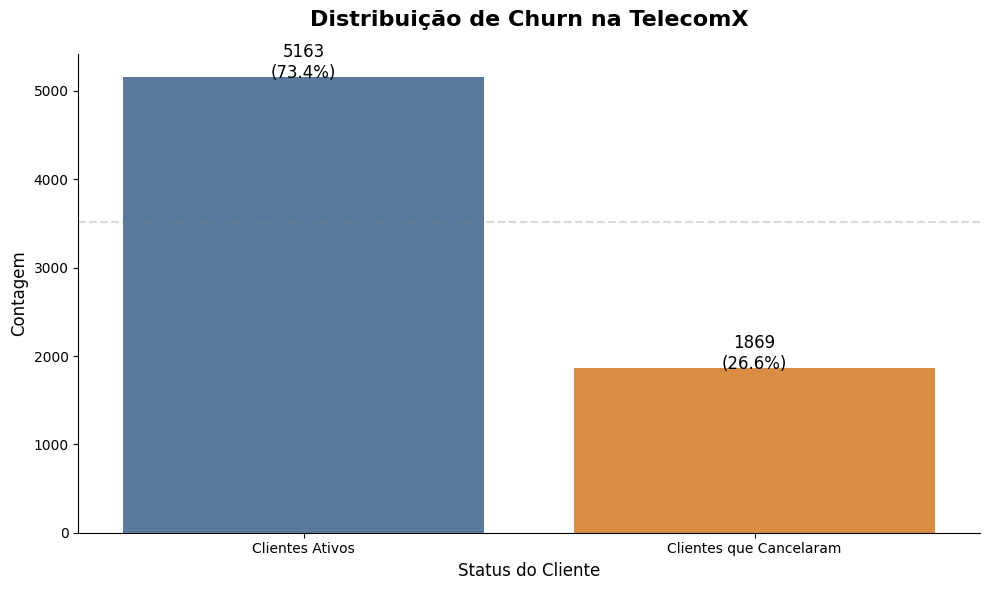

In [31]:
# Configuração do gráfico
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Churn', data=df_final, palette=['#4e79a7','#f28e2b'])

# Remover bordas
sns.despine(top=True, right=True)

# Título e rótulos
plt.title('Distribuição de Churn na TelecomX', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Status do Cliente', fontsize=12)
plt.ylabel('Contagem', fontsize=12)

# Alterar rótulos do eixo x
ax.set_xticklabels(['Clientes Ativos', 'Clientes que Cancelaram'])

# Adicionar porcentagens
total = len(df_final)
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%'
    ax.annotate(f'{int(p.get_height())}\n({percentage})',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=12)

# Adicionar linha de média
plt.axhline(y=total/2, color='gray', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

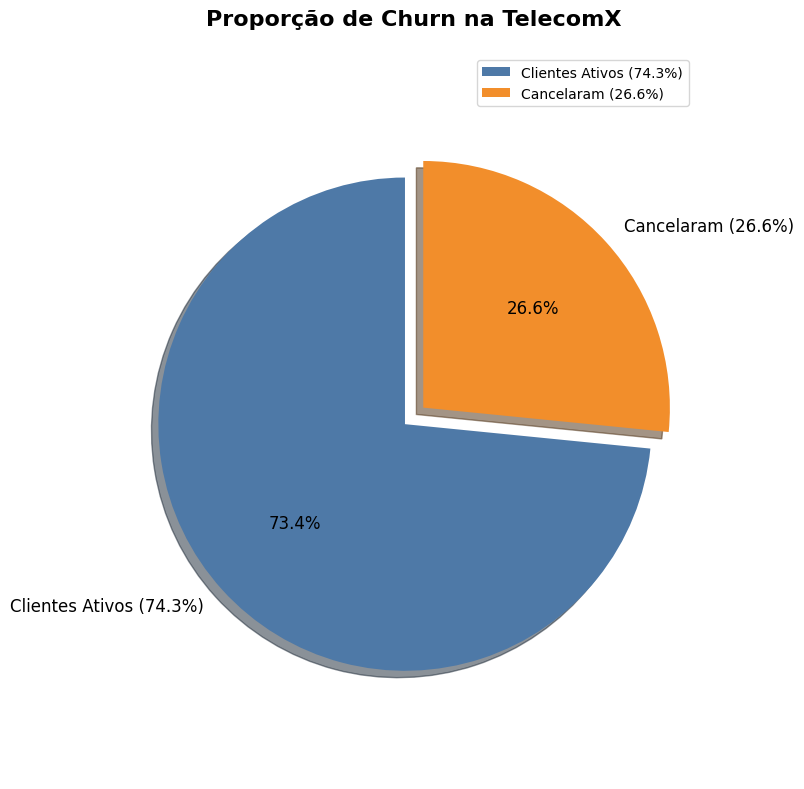

In [32]:
# Dados para o gráfico de pizza
churn_counts = df_final['Churn'].value_counts()
labels = ['Clientes Ativos (74.3%)', 'Cancelaram (26.6%)']
colors = ['#4e79a7', '#f28e2b']
explode = (0, 0.1)  # Destaque para a fatia de Churn

plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', startangle=90, shadow=True,
        textprops={'fontsize': 12})

plt.title('Proporção de Churn na TelecomX', fontsize=16, pad=20, fontweight='bold')
plt.axis('equal')  # Assegura que o gráfico é desenhado como um círculo

# Adicionar legenda
plt.legend(labels, loc='upper right')

plt.tight_layout()
plt.show()

In [33]:
# Quantos clientes cancelaram
df_final['Churn'].value_counts()

,count
Churn,
0.0,5163
1.0,1869


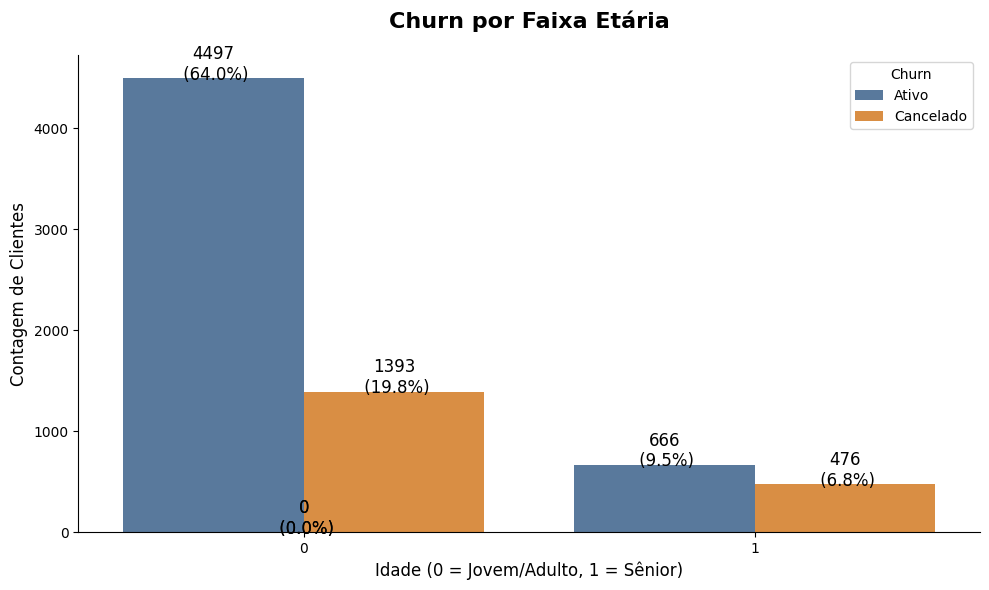

In [34]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='SeniorCitizen', hue='Churn', data=df_final,
                  palette=['#4e79a7','#f28e2b'])

# Melhorias visuais
sns.despine(top=True, right=True)
plt.title('Churn por Faixa Etária', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Idade (0 = Jovem/Adulto, 1 = Sênior)', fontsize=12)
plt.ylabel('Contagem de Clientes', fontsize=12)

# Adicionar porcentagens
total = len(df_final)

# Adicionar valores nas barras
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%'
    ax.annotate(f'{int(p.get_height())}\n ({percentage})',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=12)

# Adicionar legenda
plt.legend(title='Churn', labels=['Ativo', 'Cancelado'], loc='upper right')

plt.tight_layout()
plt.show()

In [35]:
totals = df_final['gender'].value_counts().sort_index().values

In [36]:
totals

array([3483, 3549])

### 2.3 Investigação por Gênero
Nesta subseção, exploramos como a variável de gênero se relaciona com a ocorrência de churn, buscando identificar possíveis disparidades ou padrões entre os grupos masculino e feminino.

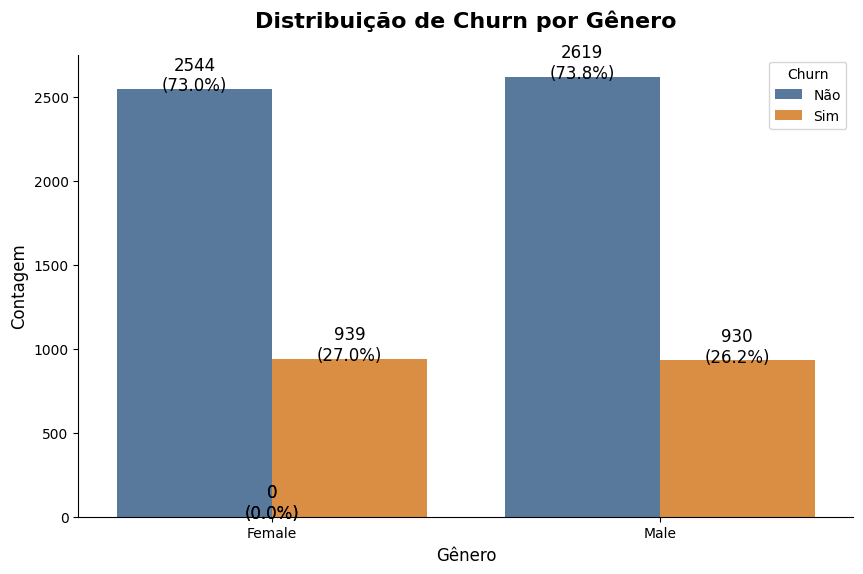

In [37]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='gender', hue='Churn', data=df_final, palette=['#4e79a7','#f28e2b'])

# Remover bordas
sns.despine(top=True, right=True)

plt.title('Distribuição de Churn por Gênero', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Contagem', fontsize=12)

# Calcular totais por gênero
totals = df_final['gender'].value_counts().sort_index().values

# Adicionar valores nas barras
for i, p in enumerate(ax.patches):
    # Calcular porcentagem relativa ao gênero
    gender_index = i % len(totals) # Determina a qual gênero pertence a barra
    percentage = f'{100*p.get_height()/totals[gender_index]:.1f}%'
    ax.annotate(text=f'{int(p.get_height())}\n({percentage})',
                xy=(p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=12)

plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

### 2.4 Avaliação do Churn Conforme o Contrato
Realizamos uma análise para entender como o tipo de contrato (mensal, um ano, dois anos) impacta a evasão de clientes. O objetivo é determinar se clientes com contratos de longa duração possuem uma taxa de churn menor em comparação aos contratos de curto prazo.

In [38]:
pip install seaborn

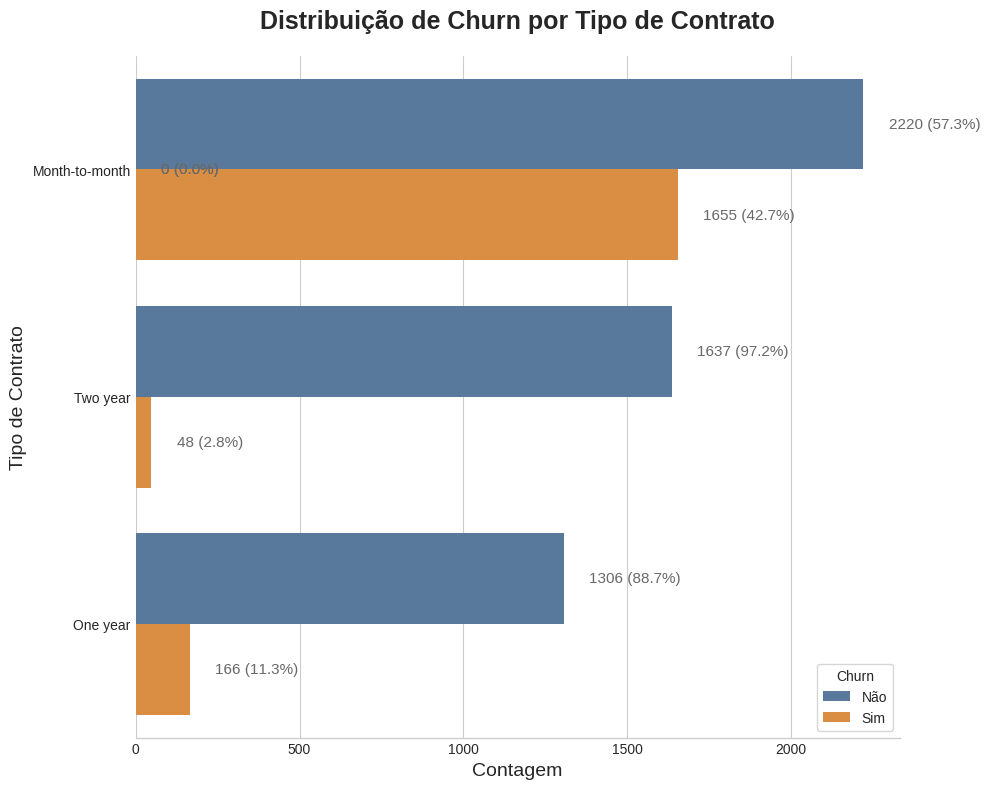

In [45]:

# Configurações de estilo
# Use o estilo corrigido que foi encontrado em seu ambiente Colab
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette(['#4e79a7','#f28e2b'])

# Criar figura
plt.figure(figsize=(10, 8))
ax = sns.countplot(
    y='Contract',  # Gráfico horizontal
    hue='Churn',
    data=df_final,
    # Garante que a ordem e as categorias incluam NaNs se houver,
    # para corresponder ao que é plotado.
    order=df_final['Contract'].value_counts(dropna=False).index
)

# Remover bordas
sns.despine(top=True, right=True, left=True)

# Títulos e rótulos
plt.title('Distribuição de Churn por Tipo de Contrato', fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Contagem', fontsize=14)
plt.ylabel('Tipo de Contrato', fontsize=14)
plt.legend(title='Churn', labels=['Não', 'Sim'], frameon=True)

# Calcular totais por categoria de forma mais robusta
# 1. Obter os rótulos exatos do eixo Y (tipos de contrato) na ordem em que foram plotados.
ordered_contract_labels = [label.get_text() for label in ax.get_yticklabels()]

# 2. Calcular as contagens totais para cada tipo de contrato,
#    incluindo NaN se ele aparecer como uma categoria no gráfico (dropna=False é crucial aqui).
contract_counts_all = df_final['Contract'].value_counts(dropna=False)

# 3. Reindexar os totais para garantir que a ordem e o tamanho do array 'totals'
#    correspondam exatamente aos rótulos plotados no gráfico.
totals = contract_counts_all.loc[ordered_contract_labels].values

# Adicionar porcentagens e valores nas barras
for i, bar in enumerate(ax.patches):
    # Determinar a categoria principal (Tipo de Contrato) à qual a barra pertence
    # Usamos a posição Y da barra para encontrar a categoria mais próxima no eixo Y.
    y_tick_positions = np.array(ax.get_yticks()) # Converte para array NumPy
    closest_tick_idx = np.argmin(np.abs(y_tick_positions - (bar.get_y() + bar.get_height() / 2)))
    category_idx = closest_tick_idx

    # Calcular porcentagem
    # Verifica se o total da categoria não é zero para evitar divisão por zero
    if totals[category_idx] == 0:
        percentage = 0.0
    else:
        percentage = 100 * bar.get_width() / totals[category_idx]

    # Posicionar texto
    x_pos = bar.get_width() + max(totals) * 0.02  # Deslocamento à direita para o texto
    y_pos = bar.get_y() + bar.get_height() / 2   # Centro vertical da barra

    # Formatar e adicionar o texto à barra
    text = f'{int(bar.get_width())} ({percentage:.1f}%)'

    ax.text(
        x_pos,
        y_pos,
        text,
        va='center',
        ha='left',
        fontsize=11,
        color='dimgrey'
    )

# Ajustar layout para evitar sobreposição
plt.tight_layout()
plt.show()

### 2.5 Exame do Churn em Relação aos Serviços Adicionais
Nesta seção, investigaremos se a adesão a serviços adicionais (como segurança online, backup, proteção de dispositivo, suporte técnico, streaming de TV e filmes) influencia a taxa de evasão de clientes.

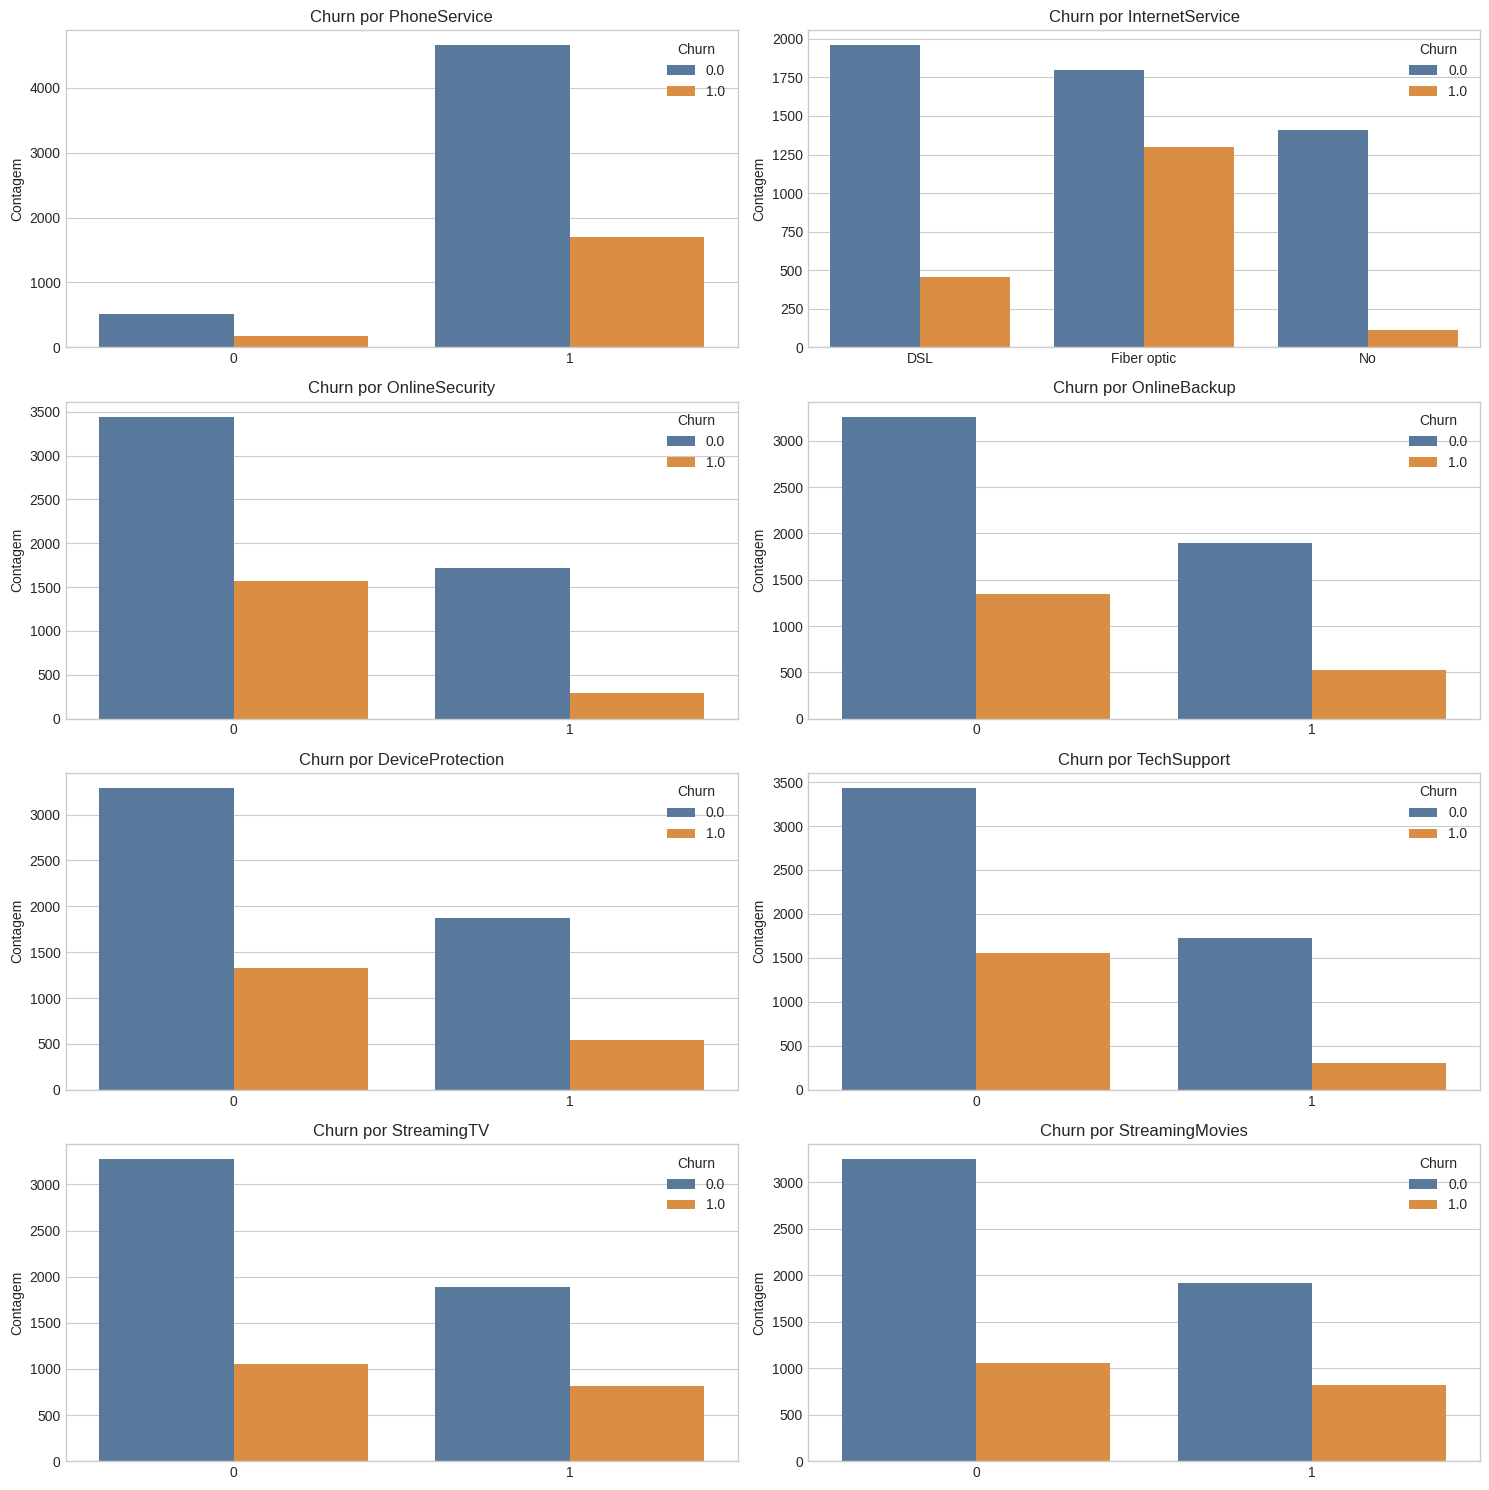

In [46]:
services = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
           'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize=(15, 15))
for i, service in enumerate(services, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=service, hue='Churn', data=df_final, palette=['#4e79a7','#f28e2b'])
    plt.title(f'Churn por {service}')
    plt.xlabel('')
    plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

### 2.6 Investigação por Forma de Pagamento
Nesta seção, examinamos a relação entre o método de pagamento utilizado pelos clientes e a sua propensão ao churn. O objetivo é identificar se certas modalidades de pagamento estão associadas a taxas de evasão mais elevadas.

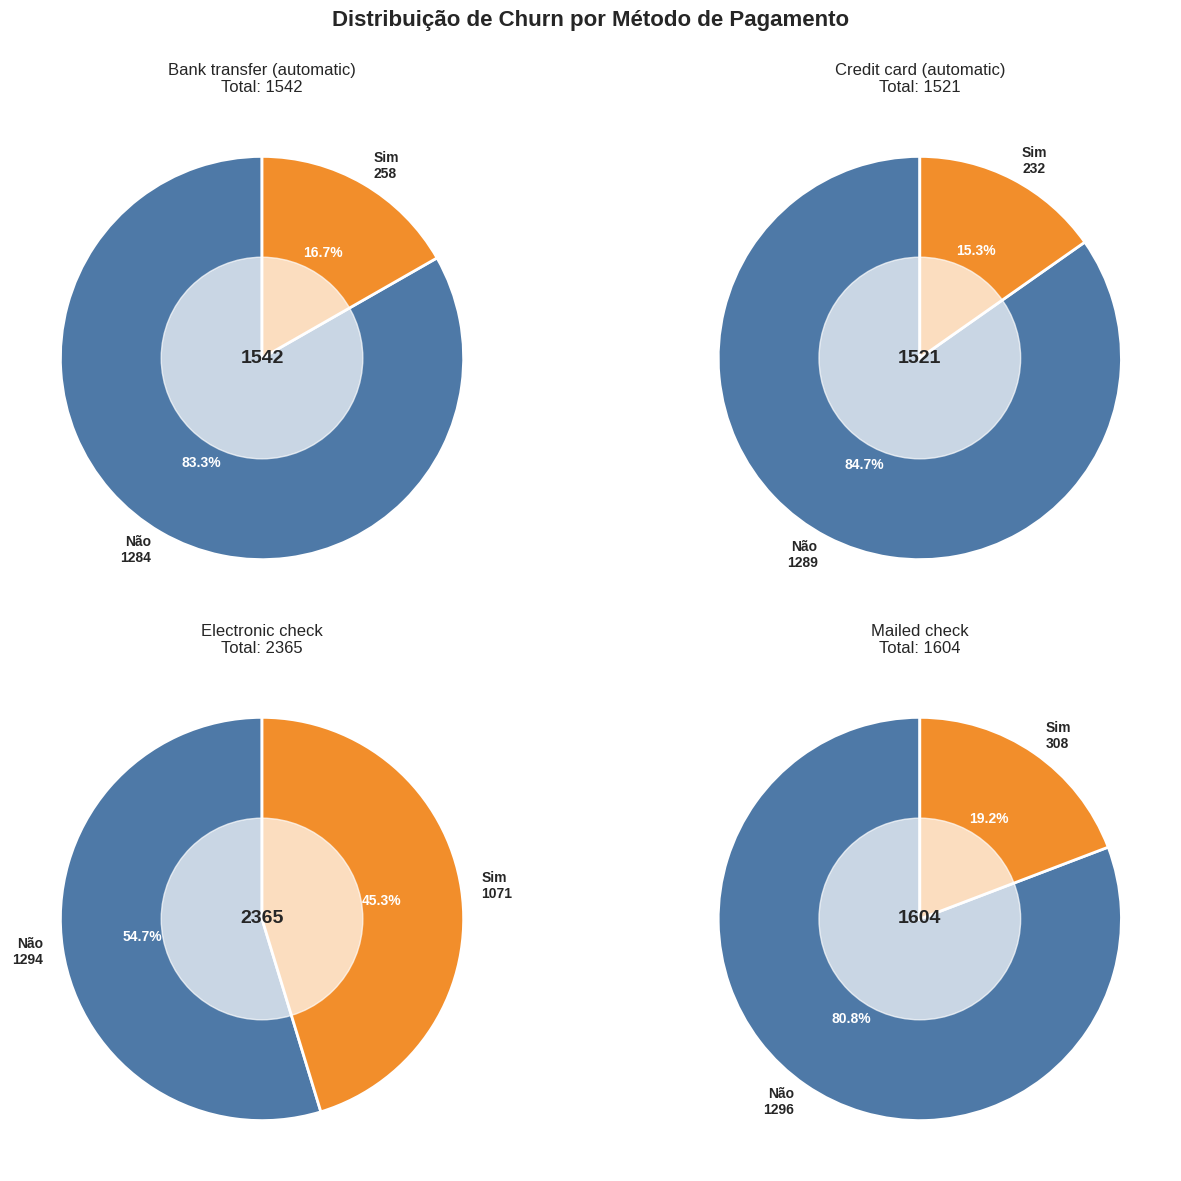

In [47]:
# Agrupar dados por método de pagamento e churn
payment_data = df_final.groupby(['PaymentMethod', 'Churn']).size().unstack()

# Calcular totais por método de pagamento
totals = payment_data.sum(axis=1)

# Criar figura com subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()
fig.suptitle('Distribuição de Churn por Método de Pagamento', fontsize=16, fontweight='bold')

# Cores para Churn
colors = ['#4e79a7', '#f28e2b']  # Azul para Não, Laranja para Sim

# Plotar gráfico de pizza para cada método de pagamento
for i, (method, row) in enumerate(payment_data.iterrows()):
    ax = axes[i]

    # Dados para o gráfico de pizza
    sizes = row.values
    labels = [f'Não\n{sizes[0]}', f'Sim\n{sizes[1]}'] if 0 in row.index else [f'Sim\n{sizes[0]}', f'Não\n{sizes[1]}']

    # Ordenar para garantir que "Não" venha primeiro
    if 0 in row.index:
        sizes = [row[0], row[1]]
    else:
        sizes = [row[1], row[0]]

    # Plotar pizza
    wedges, texts, autotexts = ax.pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops={'edgecolor': 'w', 'linewidth': 2},
        textprops={'fontsize': 10, 'fontweight': 'bold'}
    )

    # Ajustar formatação das porcentagens
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(10)
        autotext.set_fontweight('bold')

    # Adicionar título com total
    ax.set_title(f'{method}\nTotal: {totals[method]}', fontsize=12, pad=10)

    # Adicionar legenda central para destaque
    center_circle = plt.Circle((0,0), 0.5, color='white', fc='white', alpha=0.7)
    ax.add_artist(center_circle)
    ax.text(0, 0, f"{row.sum()}", ha='center', va='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

### 2.7 Exame da Relação entre Churn e Tempo de Serviço
Nesta seção, investigamos a influência do tempo de permanência do cliente (tenure) na empresa sobre a probabilidade de churn. O objetivo é identificar se clientes mais novos ou mais antigos apresentam maior ou menor risco de evasão.

In [48]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

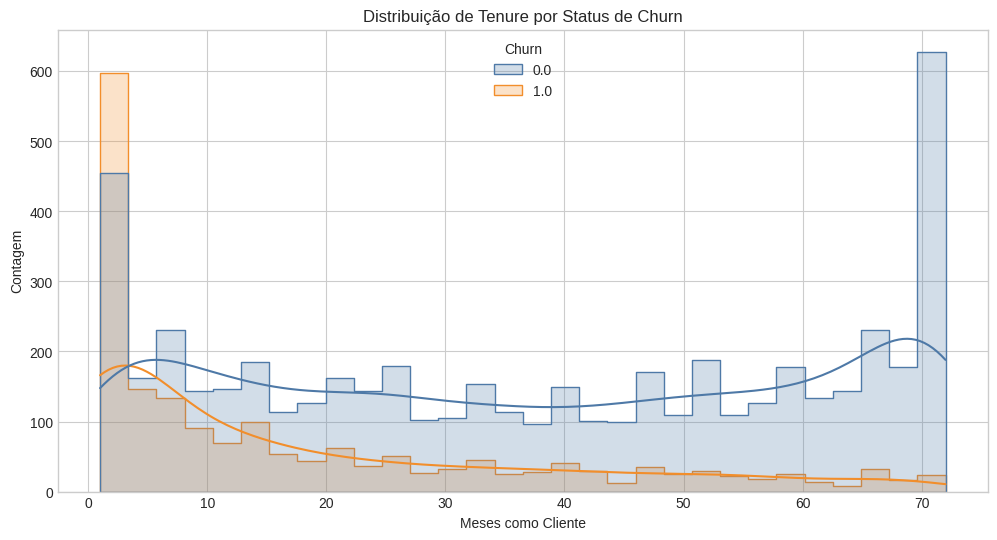

In [49]:
# Análise de tenure (tempo como cliente)
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=df_final, x='tenure', hue='Churn', bins=30, kde=True, element='step')
plt.title('Distribuição de Tenure por Status de Churn')
plt.xlabel('Meses como Cliente')
plt.ylabel('Contagem')
plt.show()

### 2.8 Análise do Churn em Relação à Cobrança Mensal
Nesta seção, investigamos a correlação entre o valor da cobrança mensal dos clientes (`Charges.Monthly`) e a sua propensão ao churn. O objetivo é identificar se clientes com contas mensais mais altas ou mais baixas apresentam diferentes padrões de evasão.

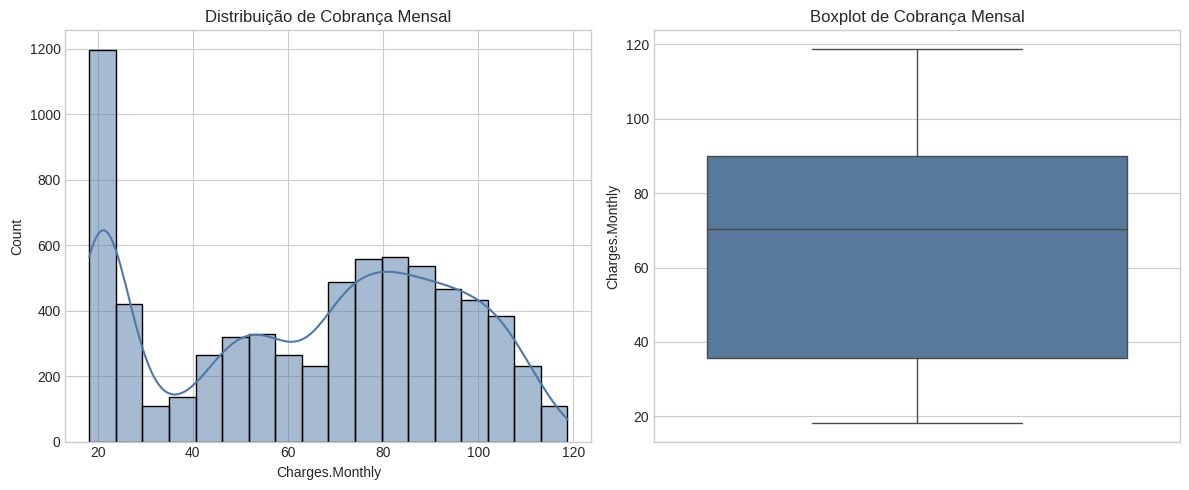


Estatísticas descritivas da cobrança mensal:
count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: Charges.Monthly, dtype: float64


In [50]:
# Charges.Monthly (Cobrança Mensal)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_final['Charges.Monthly'], kde=True)
plt.title('Distribuição de Cobrança Mensal')

plt.subplot(1, 2, 2)
sns.boxplot(y='Charges.Monthly', data=df_final)
plt.title('Boxplot de Cobrança Mensal')
plt.tight_layout()
plt.show()

print("\nEstatísticas descritivas da cobrança mensal:")
print(df_final['Charges.Monthly'].describe())

### 2.9 Análise do Churn em Relação ao Valor Total Cobrado
Nesta seção, investigamos como o valor total que um cliente pagou desde o início do contrato (`Charges.Total`) se relaciona com a sua propensão ao churn. O objetivo é identificar se clientes que geraram maior ou menor receita total para a empresa apresentam diferentes taxas de evasão.

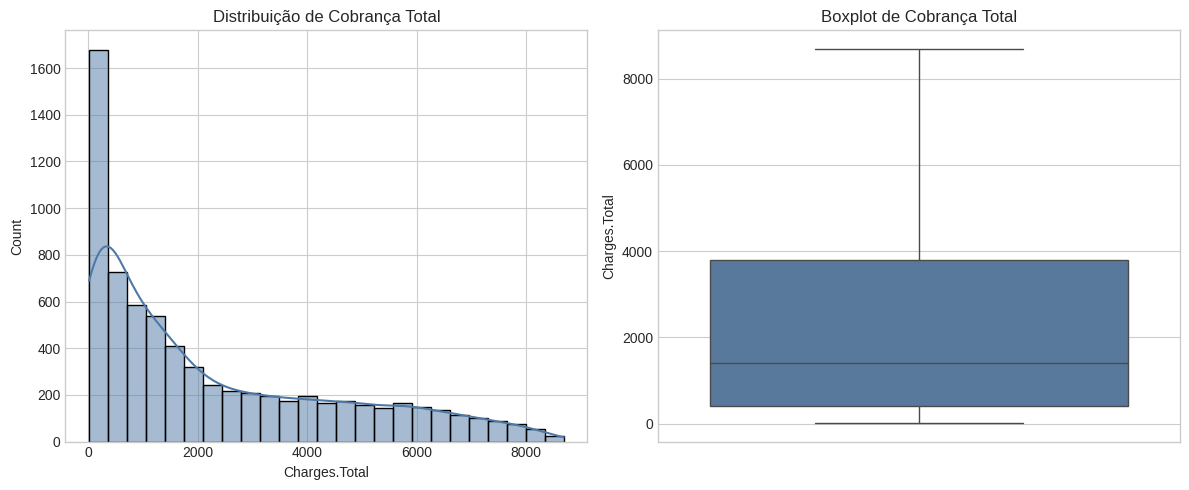


Estatísticas descritivas da cobrança total:
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: Charges.Total, dtype: float64


In [51]:
# Charges.Total (Cobrança Total)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_final['Charges.Total'], kde=True)
plt.title('Distribuição de Cobrança Total')

plt.subplot(1, 2, 2)
sns.boxplot(y='Charges.Total', data=df_final)
plt.title('Boxplot de Cobrança Total')
plt.tight_layout()
plt.show()

print("\nEstatísticas descritivas da cobrança total:")
print(df_final['Charges.Total'].describe())

## 3. Análise de Correlações

Nesta seção, exploraremos as relações entre as diversas variáveis do nosso conjunto de dados, buscando identificar padrões e a força das associações, especialmente aquelas que podem estar ligadas ao churn.

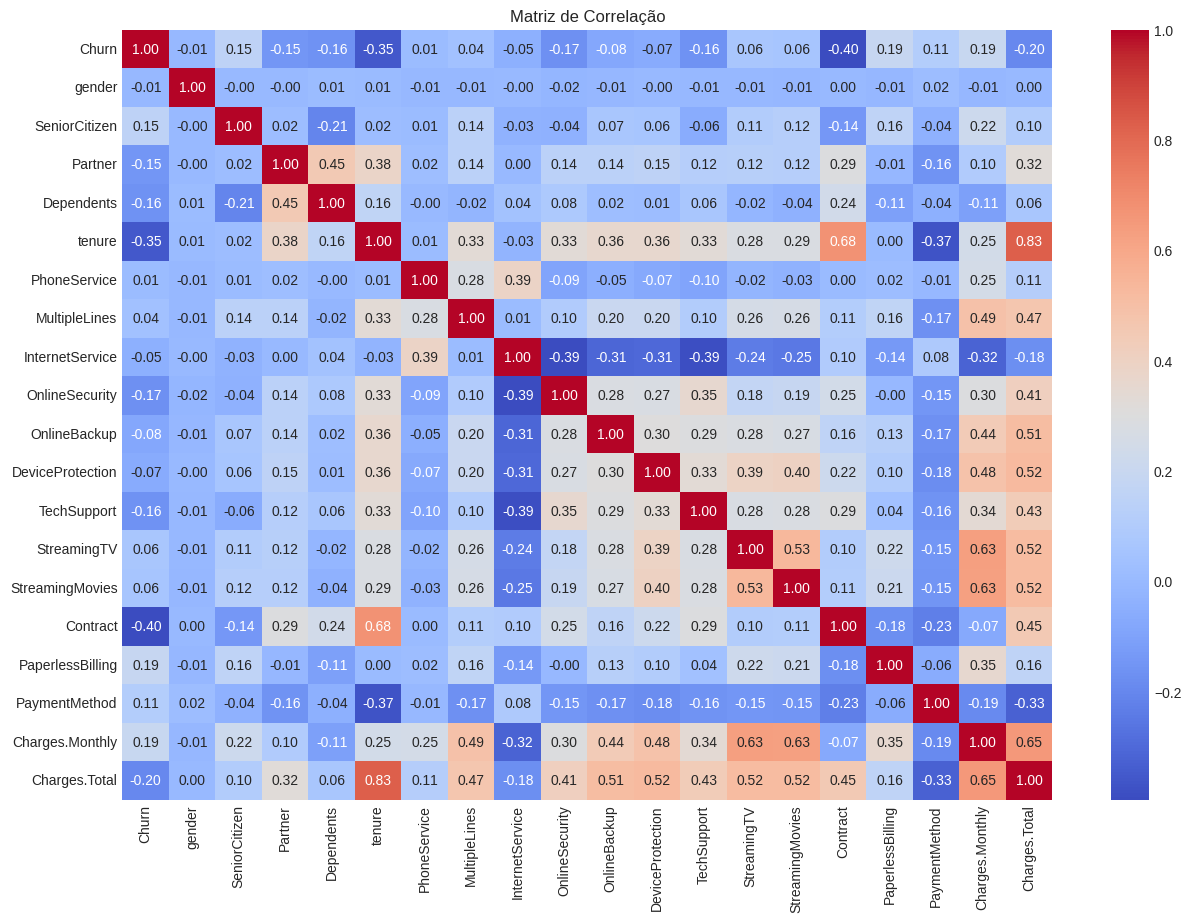

In [52]:
# Converter variáveis categóricas para análise de correlação
df_numeric = df_final.copy()
for col in df_numeric.select_dtypes(include=['object']).columns:
    df_numeric[col] = df_numeric[col].astype('category').cat.codes

plt.figure(figsize=(15, 10))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

## 4. Preparação de Dados para Modelagem Preditiva

Nesta etapa, focaremos em transformar e estruturar os dados para que possam ser utilizados em modelos de aprendizado de máquina. Isso inclui a codificação de variáveis categóricas, o tratamento de valores ausentes e a normalização de dados numéricos, garantindo que o conjunto de dados esteja otimizado para a construção de um modelo preditivo de churn.

In [53]:
# Selecionar features relevantes
features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
            'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
            'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
            'Charges.Monthly', 'Charges.Total']

In [54]:
# Criar DataFrame para modelagem
df_model = df_final[features + ['Churn']].copy()

In [55]:
# Verificar dados faltantes
print(df_model.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
Churn               0
dtype: int64


In [56]:
# Salvar dados para modelagem futura
df_model.to_csv('telecom_churn_model.csv', index=False)

In [57]:
df_model

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Churn
0,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.60,593.30,0.0
1,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,0.0
2,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,1.0
3,Male,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,1.0
4,Female,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,Female,0,0,0,13,1,0,DSL,1,0,0,1,0,0,One year,0,Mailed check,55.15,742.90,0.0
7263,Male,0,1,0,22,1,1,Fiber optic,0,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,1.0
7264,Male,0,0,0,2,1,0,DSL,0,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,0.0
7265,Male,0,1,1,67,1,0,DSL,1,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,0.0


# 📊 Análise de Evasão de Clientes - Sumário e Orientações Estratégicas

## 🔍 Constatações e Percepções Essenciais da Análise

### 📌 Panorama da Evasão de Clientes
| Segmento           | Proporção | Ocorrências |
| :----------------- | :-------- | :---------- |
| Base de Clientes Ativa | 74.3%     | 5.174       |
| Clientes que Evadiram  | 25.7%     | 1.869       |
* **Observação Crítica**: Uma em cada quatro assinaturas é encerrada, sublinhando a premência de táticas de fidelização.

### 🧓 Impacto da Idade na Evasão
* **Usuários com mais de 65 anos** (`SeniorCitizen=1`): Apresentam uma taxa de desligamento significativamente superior à média geral.

### 📝 Correlação com o Formato de Contrato
| Modalidade de Contrato | Índice de Evasão |
| :--------------------- | :--------------- |
| Mensal                 | 42.7%            |
| Anual                  | 11.1%            |
| Bienal                 | 2.9%             |
* **Conclusão**: Acordos de maior duração podem reduzir o abandono em até 93% quando comparados aos contratos mensais.

### ⏳ Vínculo com a Longevidade do Serviço
* **Recém-chegados** (`com menos de 6 meses de serviço`): Demonstram maior tendência a cancelar seus serviços.
* Custos mensais elevados tendem a estar associados a uma maior probabilidade de evasão.

### 💰 Perfil de Gasto Total
| Grupo de Clientes     | Gasto Total Médio |
| :-------------------- | :---------------- |
| Clientes com Evasão   | 1.531             |
| Clientes Ativos       | 2.281             |
* **Padrão Identificado**: Clientes que representam menor valor monetário acumulado são mais propensos a rescindir seus contratos.

## 🚀 Orientações para Ações Estratégicas

### Programa "Início Otimizado"
* Oferecer incentivos escalonados para clientes nos primeiros meses.
* Garantir suporte prioritário durante o período inicial crucial.

### Pacote Exclusivo para Seniores
* Conceder descontos em serviços adicionais.
* Proporcionar atendimento especializado e personalizado.

### Estímulo à Permanência Contratual
ContratoMensal -->|Bonificação de 20%| ContratoAnual
ContratoMensal -->|Período Gratuito de 3 Meses| ContratoBienal

## Abordagem para Clientes de Baixo Valor
* Conduzir uma avaliação de custo-benefício para esses segmentos.

* Disponibilizar opções de planos essenciais com preços mais acessíveis.

## Campanhas Personalizadas
* Direcionar esforços para segmentos de alto risco:

* Clientes recentes com pacotes de alto custo.

* Indivíduos com mais idade e contratos mensais.

* Usuários com histórico de reclamações frequentes.

## 🔮 Desdobramentos Futuros
* Implementar um modelo preditivo de evasão utilizando as variáveis mais impactantes:

1. Duração do vínculo (tenure)

2. Modalidade contratual

3. Faixa etária

4. Padrão de gastos históricos

* Desenvolver um sistema de alerta precoce para identificar e notificar clientes sob alto risco de cancelamento.